## Importing libraries and files

In [1]:
import pandas as pd
from keras.models import load_model
import pickle
import numpy as np
import matplotlib.pyplot as plt

ann_arr = load_model('Arrival_time/Arrival_ANN_model_3.h5')
ann_end = load_model('End_time/End_ANN_model_8.h5')
ann_chg = load_model('Change_time/Change_ANN_model_3.h5')
regressor = pickle.load(open('Pressure_profiles_codes_sectioned_regression/XGB_14.sav', 'rb'))
sc = pickle.load(open('Pressure_profiles_codes_sectioned_regression/scaler.pkl', 'rb'))

## Input details

In [81]:
charge_mass = 20
time = 0.015
atm_pressure = 101200

In [82]:
start, stop, n_values = -5, 5, 200

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = np.sqrt(X**2 + Y**2)
print (Z.shape)

c_d = Z.reshape(-1)
c_d = c_d.reshape(len (c_d), 1)
print (c_d)
print (c_d.shape)
print ("value", c_d[4,0])

(200, 200)
[[7.07106781]
 [7.03562454]
 [7.00036254]
 ...
 [7.00036254]
 [7.03562454]
 [7.07106781]]
(40000, 1)
value 6.930393406500779


In [83]:
c_m = np.repeat(charge_mass, len(c_d)).reshape(len(c_d),1)
print (c_m.shape)
print (c_m)

c_t = np.repeat(time, len(c_d)).reshape(len(c_d),1)
print (c_t.shape)
print (c_t)

(40000, 1)
[[20]
 [20]
 [20]
 ...
 [20]
 [20]
 [20]]
(40000, 1)
[[0.015]
 [0.015]
 [0.015]
 ...
 [0.015]
 [0.015]
 [0.015]]


In [84]:
c_arr = np.concatenate ((c_m, c_d), axis = 1)
print (c_arr)
change_time = ann_chg.predict(c_arr)
print (change_time)

[[20.          7.07106781]
 [20.          7.03562454]
 [20.          7.00036254]
 ...
 [20.          7.00036254]
 [20.          7.03562454]
 [20.          7.07106781]]
1250/1250 [==============================] - 1s 1ms/step
[[0.01430518]
 [0.01420161]
 [0.01409862]
 ...
 [0.01409862]
 [0.01420161]
 [0.01430518]]


In [85]:
arrival_time = ann_arr.predict(c_arr)
print (arrival_time)
print (len(arrival_time))
print (min(arrival_time))

1250/1250 [==============================] - 2s 2ms/step
[[0.01015601]
 [0.01008085]
 [0.01000619]
 ...
 [0.01000619]
 [0.01008085]
 [0.01015601]]
40000
[-0.00294628]


In [86]:
end_time = ann_end.predict(c_arr)
print (min (end_time))
print (min(arrival_time))

1250/1250 [==============================] - 1s 1ms/step
[0.03691121]
[-0.00294628]


In [87]:
if time < change_time[0]:
    c_ph = np.array([[0, 1]])
else:
    c_ph = np.array([[1, 0]])
    
positive = np.array([0, 1])
negative = np.array([1, 0])
count =0
for (c_time, c_distance) in zip(change_time[1:],c_d[1:]):
    if time < c_time:
        c_ph=np.vstack((c_ph,positive))
        count+=1
       
    else:
        c_ph=np.vstack((c_ph,negative))
        print (c_distance)
print (count)
print (len(c_ph))
print (c_ph)

[7.03562454]
[7.00036254]
[6.96528456]
[6.93039341]
[6.89569191]
[6.86118295]
[6.82686944]
[6.79275434]
[6.75884067]
[6.72513147]
[6.69162982]
[6.65833886]
[6.62526177]
[6.59240177]
[6.55976212]
[6.52734612]
[6.49515712]
[6.46319851]
[6.43147374]
[6.39998627]
[6.36873963]
[6.33773737]
[6.30698311]
[6.27648048]
[6.24623318]
[6.21624492]
[6.18651949]
[6.15706068]
[6.12787234]
[6.09895835]
[6.07032264]
[6.04196916]
[6.01390189]
[5.98612488]
[5.95864217]
[5.93145786]
[5.90457607]
[5.87800095]
[5.85173668]
[5.82578746]
[5.80015752]
[5.77485111]
[5.7498725]
[5.72522599]
[5.70091588]
[5.6769465]
[5.65332217]
[5.63004724]
[5.60712606]
[5.58456299]
[5.56236238]
[5.5405286]
[5.51906599]
[5.4979789]
[5.47727168]
[5.45694864]
[5.43701409]
[5.41747232]
[5.3983276]
[5.37958416]
[5.36124622]
[5.34331795]
[5.32580348]
[5.30870692]
[5.29203231]
[5.27578365]
[5.25996489]
[5.24457992]
[5.22963257]
[5.21512661]
[5.20106571]
[5.18745352]
[5.17429356]
[5.16158929]
[5.14934409]
[5.13756124]
[5.12624393]
[5.1

In [88]:
c_arr_2 = np.concatenate ((c_m, c_d, c_t, c_ph), axis = 1)
c_arr_2[:,0:3] = sc.transform(c_arr_2[:,0:3])
c_p = regressor.predict(c_arr_2)
print (c_p)
c_p = c_p.reshape(len (c_p), 1)
print (c_p)
print (len(c_p))

[92505.32 92505.32 92505.32 ... 92505.32 92505.32 92505.32]
[[92505.32]
 [92505.32]
 [92505.32]
 ...
 [92505.32]
 [92505.32]
 [92505.32]]
40000


In [89]:
print (time)

0.015


In [90]:
for index, (c_pressure,  c_arrival, c_end) in enumerate(zip(c_p, arrival_time, end_time)):
    if time < c_arrival:
        #print (c_arrival)
        c_p[index] = atm_pressure
        
    elif time > c_end:
        print (c_end)
        c_p[index] = atm_pressure

In [91]:
c_p = c_p.reshape(200, 200)
print (c_p)

[[92505.32 92505.32 92505.32 ... 92505.32 92505.32 92505.32]
 [92505.32 92505.32 92505.32 ... 92505.32 92505.32 92505.32]
 [92505.32 92505.32 92505.32 ... 92505.32 92505.32 92505.32]
 ...
 [92505.32 92505.32 92505.32 ... 92505.32 92505.32 92505.32]
 [92505.32 92505.32 92505.32 ... 92505.32 92505.32 92505.32]
 [92505.32 92505.32 92505.32 ... 92505.32 92505.32 92505.32]]


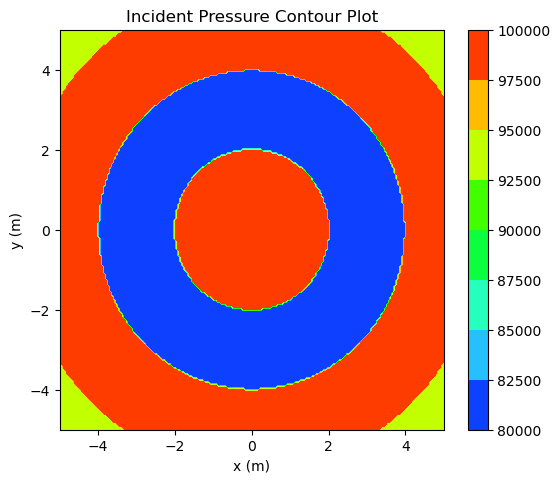

In [92]:
import matplotlib
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.25, 0.2, 0.2),
                 (0.5, 0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
        'green':((0.0, 0.0, 0.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 1.0, 1.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
        'blue': ((0.0, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 0.0, 0.0),
                 (0.75, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
#levels = np.linspace(100, 12500, 101)
cp = plt.contourf(X, Y, c_p, cmap = my_cmap)
plt.colorbar(cp)

ax.set_title('Incident Pressure Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()